In [ ]:
# Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist
import random

In [ ]:
# 2. Load dữ liệu MNIST
# Tải dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
X_val, y_val = X_train[50000:60000], y_train[50000:60000]
X_train, y_train = X_train[:50000], y_train[:50000]

print(X_train.shape)

(50000, 28, 28)


In [ ]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà Keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# 4. One hot encoding Label (Y)
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)

print('Dữ liệu y ban đầu:', y_train[0])
print('Dữ liệu y sau one-hot encoding:', Y_train[0])

Dữ liệu y ban đầu: 5
Dữ liệu y sau one-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 5. Định nghĩa model Sequential()
model = Sequential()

# Thêm Convolutional Layer với 32 kernel, kích thước kernel 3*3 và hàm sigmoid activation
# chỉ rõ input_shape cho Layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))

# Thêm Convolutional Layer II
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected Layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output Layer với 10 node và dùng softmax function để chuyển sang xác xuất
model.add(Dense(10, activation='softmax'))


In [ ]:
# 6. Compile model, chỉ rõ hàm Loss_function nào được sử dụng, phương thức
# Dùng để tối ưu hàm Loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=2, verbose=1)

Epoch 1/2
1563/1563 [==============================] - 104s 65ms/step - loss: 0.3810 - accuracy: 0.8897 - val_loss: 0.0746 - val_accuracy: 0.9799
Epoch 2/2
1563/1563 [==============================] - 94s 60ms/step - loss: 0.0558 - accuracy: 0.9841 - val_loss: 0.0502 - val_accuracy: 0.9849


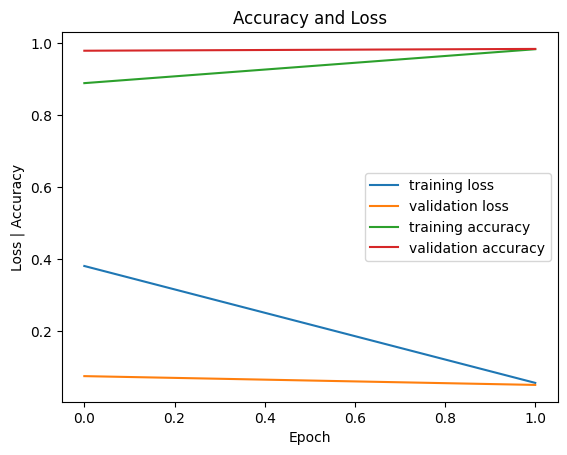

In [ ]:
# 8. Vẽ đồ thị Loss, accuracy của training set và validation set
fig = plt.figure()

numOfEpoch = 2

plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')

plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')

plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='training accuracy')

plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')

plt.title('Accuracy and Loss')

plt.xlabel('Epoch')

plt.ylabel('Loss | Accuracy')

plt.legend()
plt.show()

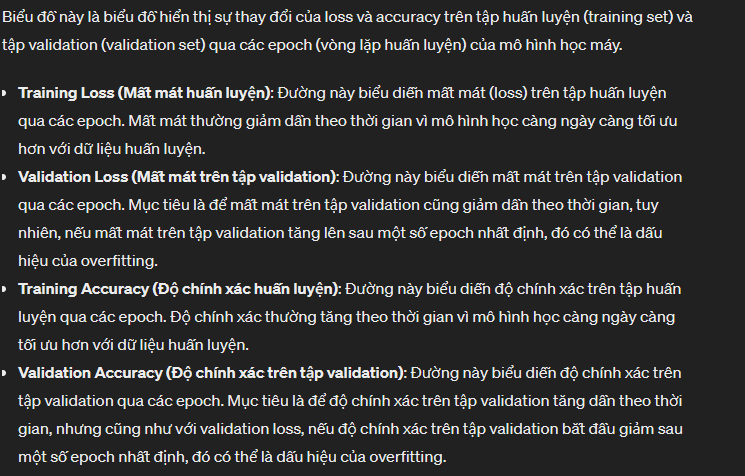

In [ ]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.044336315244436264, 0.98580002784729]


1/1 [==============================] - 0s 243ms/step
Giá trị dự đoán: 8


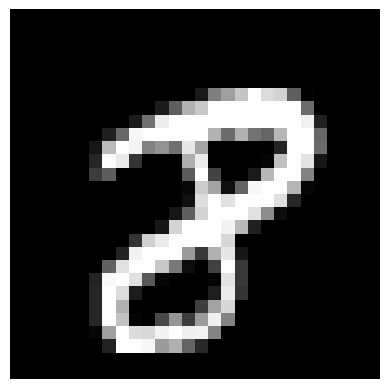

In [ ]:
# 10. Dự đoán ảnh

# Chọn ngẫu nhiên một ảnh từ tập test
random_index = random.randint(0, len(X_test) - 1)
random_image = X_test[random_index]

# Hiển thị ảnh được chọn
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.axis('off')

# Dự đoán nhãn của ảnh
y_predict = model.predict(random_image.reshape(1, 28, 28, 1))
predicted_label = np.argmax(y_predict)

# In ra kết quả dự đoán
print('Giá trị dự đoán:', predicted_label)